# Pymaceuticals Inc.
---

### Analysis

Pymaceuticals, Inc. conducted an analysis on the efficacy of various cancer treatment regimens (including Capomulin, Ramicane, Infubinol, and Ceftamin) using a total of 248 mice (excluding g989). The data revealed a nearly equal distribution between male and female mice.

Based on the final tumor volume across different treatment regimens, Capomulin and Ramicane look to be the more effective drug regimens to reduce tumor,  Infubinol and Ceftamin to be the less effective. 

The average tumor volume for mice treated with Capomulin (40.676 mm3) and Ramicane (40.217 mm3) was lowest as compared to the average tumor volume of treatments with other drugs (ranging between 52.321 mm3 and 55.236 mm3). 

The tumor volume data of both Capomulin and Ramicane also had the lowest standard deviation, variance, and standard error as compared with tumor volumes of mice treated with other drugs.

Capomulin's potential outliers were not identified, and the range of final tumor volumes for mice on this regimen is between 20.70 mm3 and 51.83 mm3.

Similar to Capomulin, Ramicane shows no potential outliers. The range of final tumor volumes for mice on Ramicane is between 17.91 mm3 and 54.31 mm3.

Furthermore, a strong positive correlation of 0.84 was observed between mouse weight and average tumor volume across Capomulin. The correlation is represented by the linear regression equation: y=0.95x+21.55.

Note to Central Grader:

There is a discrepancy in interpreting the question regarding the "distribution of female versus male mice." Initially, I utilized the mouse_metadata where there is only one row per mouse ID, resulting in a total of 248 mice after excluding g989. Based on this approach, there should be 125 males (50.4%) and 123 females (49.6%).

However, this outcome is different from the starter sample chart provided in the Module 5 Challenge files, which shows that Male 51.0% and Female = 49.0%. Therefore, in the final solution, I adjusted the method to align with the starter sample chart, despite recognizing that the initial approach may be more accurate.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data_df = pd.merge(study_results,mouse_metadata,how='left', on='Mouse ID')

# Format the 'Tumor Volume (mm3)' column to display values with one decimal place so it matches the cosmetic look of the given output
# Actually not required
#combined_data_df['Tumor Volume (mm3)'] = combined_data_df['Tumor Volume (mm3)'].map('{:.1f}'.format)

# Display the data table for preview
combined_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
count = len(combined_data_df['Mouse ID'].unique())
count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Reference: Pandas DataFrame duplicated() Method https://www.geeksforgeeks.org/pandas-dataframe-duplicated/
    # The code checks for duplicate rows in the DataFrame based on the 'Mouse ID' and 'Timepoint', 
    # making duplicates as 'True' and picks the 'Mouse ID" column from selected rows, which contains IDs of mice w/ duplicate records\

duplicate_mice = combined_data_df[combined_data_df.duplicated(['Mouse ID', 'Timepoint'])]

#duplicate_mice

# Extract the unique mouse IDs from the duplicated rows
duplicate_mice['Mouse ID'].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = combined_data_df.loc[combined_data_df['Mouse ID'] == 'g989']
duplicate_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Technique: Boolean indexing / use a boolean mask to filter the data, i.e. not 'g989'
# Technique reference: https://www.geeksforgeeks.org/boolean-indexing-in-pandas/
# Actual reference : https://www.geeksforgeeks.org/drop-rows-from-the-dataframe-based-on-certain-condition-applied-on-a-column/

cleaned_data_df = combined_data_df[combined_data_df['Mouse ID'] != 'g989']
cleaned_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_count = len(cleaned_data_df['Mouse ID'].unique())
clean_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_regimen = cleaned_data_df.groupby("Drug Regimen")["Drug Regimen"].unique().str[0]
# drug_regimen

mean_tumor_volume = cleaned_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
# mean_tumor_volume

median_tumor_volume = cleaned_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
# median_tumor_volume

variance_tumor_volume = cleaned_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
# variance_tumor_volume

std_dev_tumor_volume = cleaned_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
# std_dev_tumor_volume

std_err_tumor_volume = cleaned_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
# std_err_tumor_volume 

summary = pd.DataFrame({"Mean Tumor Volume": mean_tumor_volume,
                         "Median Tumor Volume": median_tumor_volume,
                         "Tumor Volume Variance": variance_tumor_volume,
                         "Tumor Volume Std. Dev.": std_dev_tumor_volume,
                         "Tumor Volume Std. Err.": std_err_tumor_volume})

summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
adv_summary = cleaned_data_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
adv_summary



,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

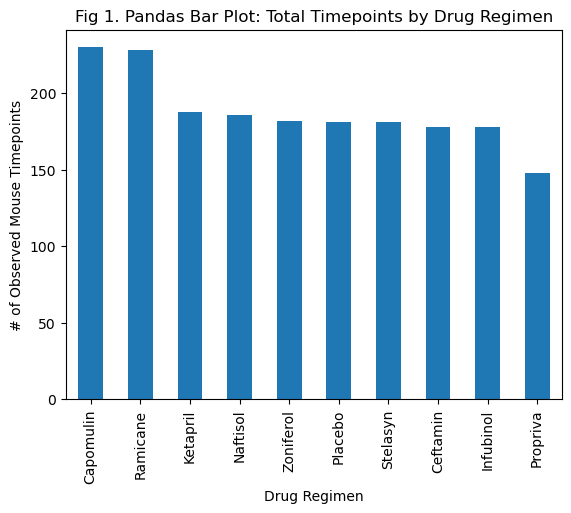

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

timepoints_data = cleaned_data_df.groupby('Drug Regimen')['Timepoint'].count().sort_values(ascending=False)

fig1 = timepoints_data.plot(kind="bar", title = "Fig 1. Pandas Bar Plot: Total Timepoints by Drug Regimen")
fig1.set_xlabel("Drug Regimen")
fig1.set_ylabel("# of Observed Mouse Timepoints")

plt.show()



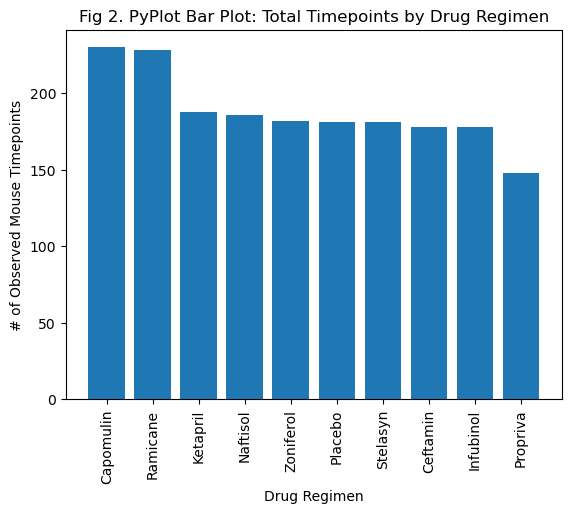

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

timepoints_data = cleaned_data_df.groupby('Drug Regimen')['Timepoint'].count().sort_values(ascending=False)

plt.bar(timepoints_data.index, timepoints_data)
plt.title("Fig 2. PyPlot Bar Plot: Total Timepoints by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

# Set x axis and tick locations based on filtered data from previous chart
x_axis = range(len(timepoints_data))

# Set the tick locations and create ticks for bar chart's x-axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, timepoints_data.index, rotation=90)

plt.show()

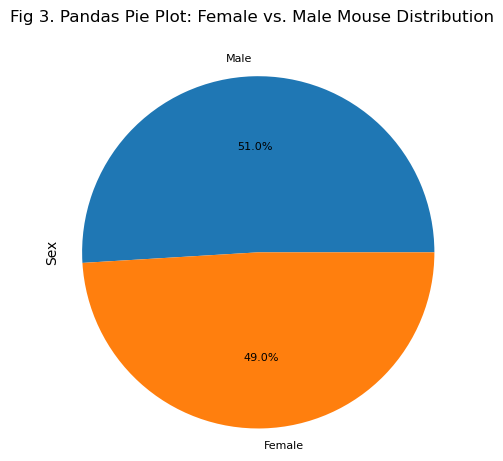

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Filter the dataframe only to the data needed for the chart

# Discepancy with understanding the question about "distribution of female versus male mice"
# using mouse_metadata so there is only 1 row per mouse ID
# there are 248 mouse in total after dropping g989, so there should be 125 Male (50.4%) and 123 Female (49.6%)
# however, this does not match the starter sample chart in the Module 5 Challenge files, which shows that Male 50.4% and Female = 49.6%

# filtered_data = mouse_metadata[mouse_metadata['Mouse ID'] != 'g989']
# gender_counts = filtered_data['Sex'].value_counts()

# gender_counts

# Print the counts
# print(gender_counts)

#  Use the filtered data to create a pie chart and add title
#figure3 = gender_counts.plot(kind="pie", autopct="%1.1f%%", 
##                        legend=False, fontsize=8, title="Pandas Pie Plot: Female vs. Male Mouse Distribution")

 # Set x-axis label
#figure3.set_ylabel("Sex")

#  Show th echart
# plt.axis("equal")
# plt.show()

# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Filter the dataframe only to the data needed for the chart
gender = cleaned_data_df['Sex'].value_counts()

# Use the filtered data to create a pie chart and add title and set Y axis
fig3 = gender.plot(kind="pie", y='Sex', autopct="%1.1f%%", figsize=(5,5), subplots=True, 
                      legend=False, fontsize=8, title="Fig 3. Pandas Pie Plot: Female vs. Male Mouse Distribution", ylabel="Sex")

plt.axis("equal")

# Show th echart
plt.show()


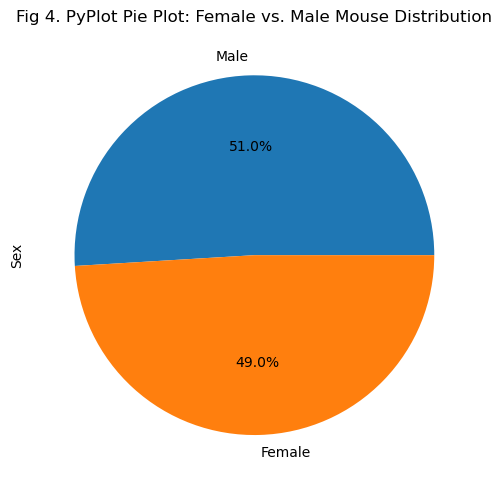

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Create the chart using filtered data from previous chart

fig4 = plt.pie(gender, labels=gender.index.values,
        autopct="%1.1f%%", shadow=False, startangle=0)

# Add title and labels to the chart
plt.title("Fig 4. PyPlot Pie Plot: Female vs. Male Mouse Distribution")
plt.ylabel("Sex")

# Show the chart
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [35]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
group_df = cleaned_data_df.groupby(cleaned_data_df['Mouse ID'])['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
treatments_df = pd.merge(cleaned_data_df, group_df, on=('Mouse ID', 'Timepoint'), how='right')

treatments_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_data = treatments_df.loc[treatments_df["Drug Regimen"] == drug]
    # add subset 
    tumor_vol_data.append(drug_data["Tumor Volume (mm3)"])
    # Determine outliers using upper and lower bounds
    quartiles = drug_data['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = round(lowerq - (1.5*iqr), 5)
    upper_bound = round(upperq + (1.5*iqr), 5)
    outliers = drug_data.loc[(drug_data["Tumor Volume (mm3)"] >= upper_bound) | 
                             (drug_data["Tumor Volume (mm3)"] <= lower_bound)]
    outliers_values = outliers['Tumor Volume (mm3)']
    print(f"{drug} has lower boundary of {lower_bound} and upper boundary of {upper_bound}.")
    print(f"{drug}'s potential outliers: {outliers_values}")
    print(f"___________________________________________________________________________________")

Capomulin has lower boundary of 20.70456 and upper boundary of 51.83202.
Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
___________________________________________________________________________________
Ramicane has lower boundary of 17.91266 and upper boundary of 54.30681.
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
___________________________________________________________________________________
Infubinol has lower boundary of 36.8329 and upper boundary of 82.74145.
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
___________________________________________________________________________________
Ceftamin has lower boundary of 25.35545 and upper boundary of 87.66646.
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
___________________________________________________________________________________


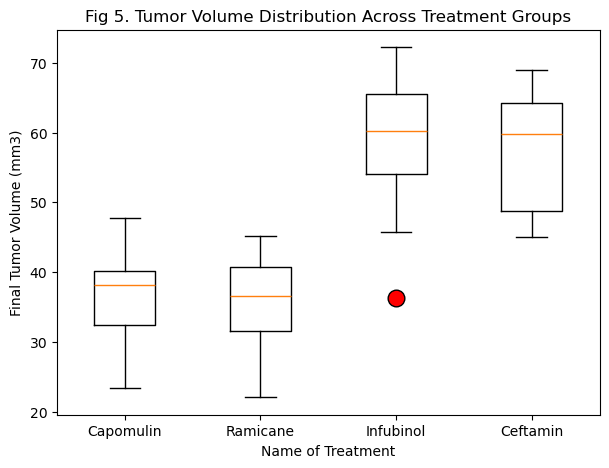

In [26]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

#display details for the outliers
marker_details = dict(markerfacecolor='r', markersize=12, markeredgecolor='black')

figure5, ax1=plt.subplots()
ax1.boxplot(tumor_vol_data, flierprops=marker_details)
plt.title("Fig 5. Tumor Volume Distribution Across Treatment Groups")
plt.xlabel('Name of Treatment')
plt.ylabel("Final Tumor Volume (mm3)")
plt.rcParams["figure.figsize"]=(7,5)
plt.rcParams["font.size"]=10
plt.tick_params(labelsize=10)
plt.xticks([1, 2, 3, 4], treatments)

plt.show()

## Line and Scatter Plots

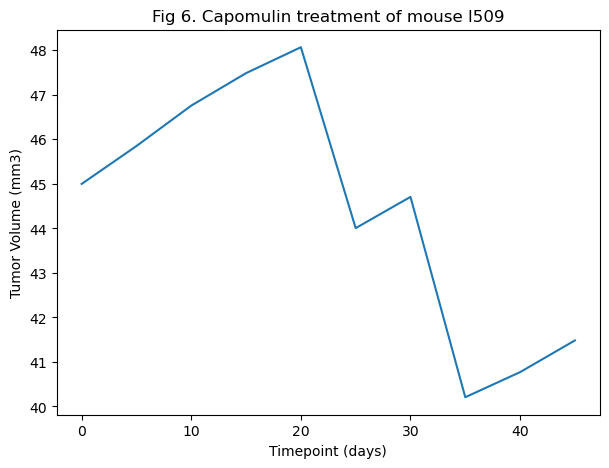

In [28]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Get the data for Timepoint and Tumor Volume for mouse L509 
line = cleaned_data_df.loc[cleaned_data_df["Mouse ID"] == "l509"]
timepoint = line["Timepoint"]
tumor = line["Tumor Volume (mm3)"]

# Plot the data
fig6 = plt.plot(timepoint, tumor)

# Add chart title and labels
plt.title("Fig 6. Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

# Show the chart
plt.show()

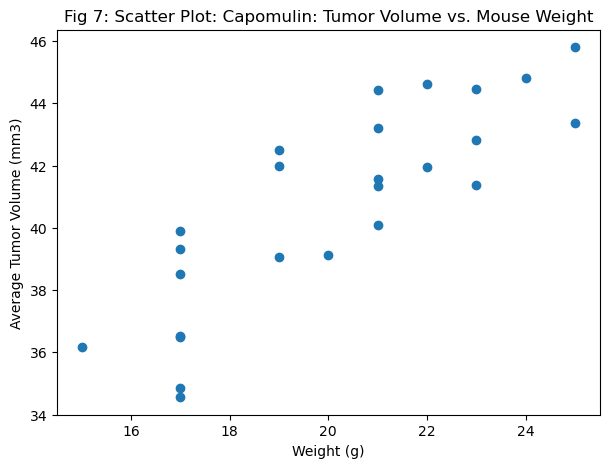

In [30]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
## techqiue reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html
# Get the data for Average Tumor Volume and Mouse Weight for Capomulin and group by Mouse ID
scatter = cleaned_data_df.loc[cleaned_data_df["Drug Regimen"] == "Capomulin"]
scatter_avg = scatter.groupby(['Mouse ID']).mean(numeric_only=True)

avg_tumor_volume = scatter_avg["Tumor Volume (mm3)"]
mouse_weight = scatter_avg["Weight (g)"]

# Plot the data
fig7 = plt.scatter(mouse_weight, avg_tumor_volume)

# Add chart title and labels
plt.title("Fig 7: Scatter Plot: Capomulin: Tumor Volume vs. Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Show the chart
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


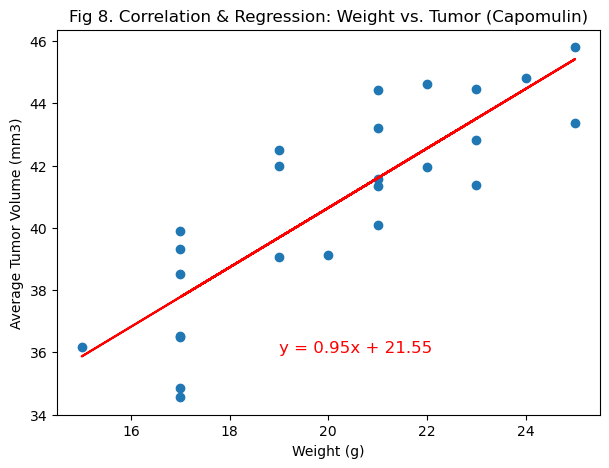

In [37]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the correlation coefficient
correlation = st.pearsonr(mouse_weight, avg_tumor_volume)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

from scipy.stats import linregress
# Add the linear regression equation and line to the scatter plot
# Re-name data arrays to x_values and y_values for easy reference
x_values = mouse_weight
y_values = avg_tumor_volume

# Calculate the values for linear regression model and draft the linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Chart the data into scatter plot
fig8 = plt.scatter(x_values,y_values)

# Draw the slope and insert the linear equation
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(19,36),fontsize=12,color="red")

# Add chart title and labels
plt.title("Fig 8. Correlation & Regression: Weight vs. Tumor (Capomulin)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Show the chart
plt.show()